In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [81]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [86]:
data.shape

(1599, 12)

<Axes: >

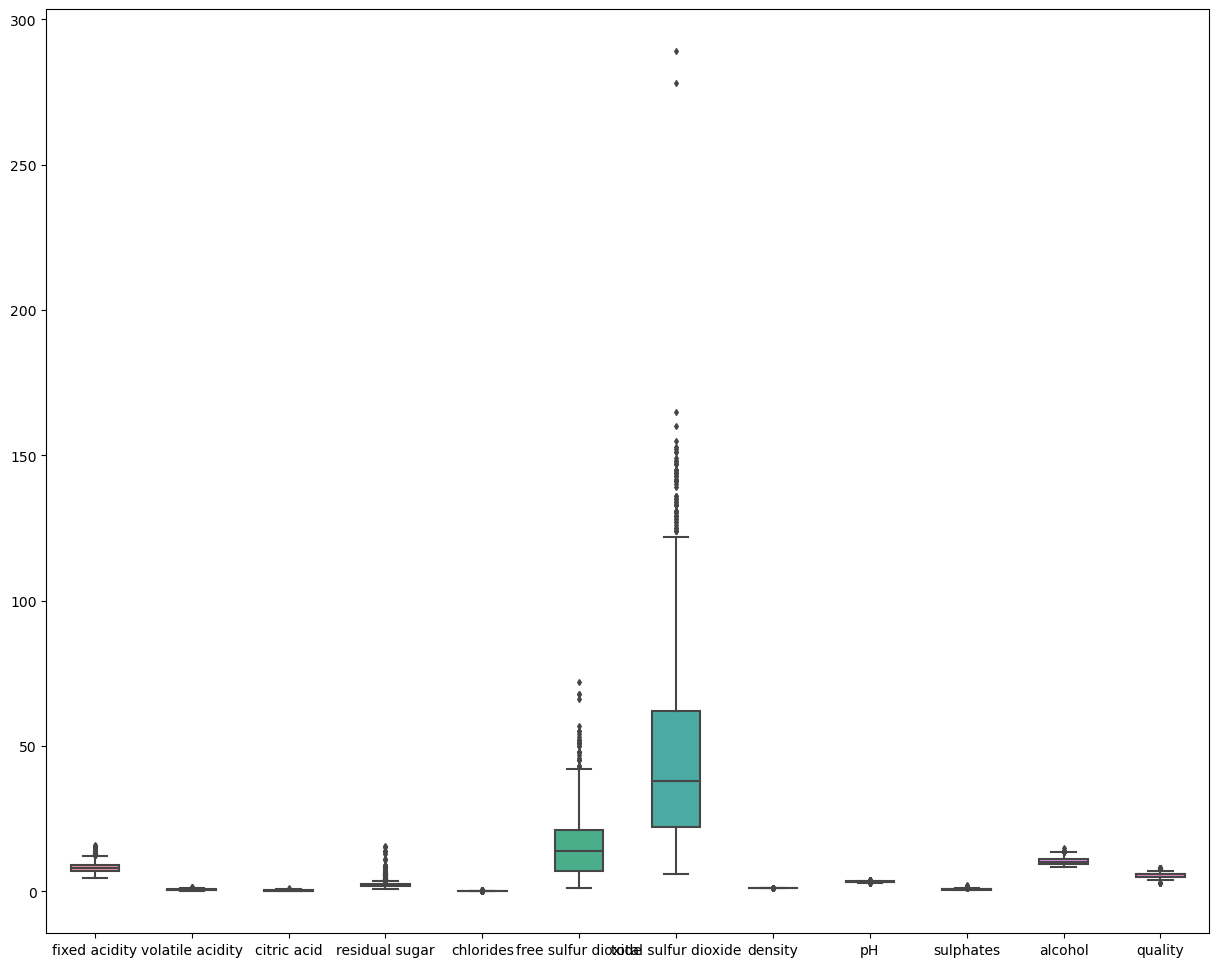

In [87]:
fig,ax = plt.subplots(figsize = (15,12))
sns.boxplot(data = data,ax =ax,width = 0.5,fliersize=3)

In [88]:
X = data.drop("quality",axis = 1)
y = data.quality

In [89]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [90]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.33,random_state=42)

### Support Vector Classification 

In [94]:
from sklearn.svm import SVC
model = SVC()

In [95]:
model.fit(X_train,y_train)

SVC()

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
model.score(X_train,y_train)  #model training accuracy

0.6788048552754435

In [98]:
y_pred = model.predict(X_test)
y_pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [99]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5984848484848485

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model2= LogisticRegression()

In [102]:
model2.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred2 = model2.predict(X_test)

In [104]:
#we can predict one row also
X_test[0]

array([-0.35600048,  0.17976995, -0.98066858, -0.02753165,  0.56393475,
       -0.17930021, -0.01422508,  0.18726488, -0.46076217,  0.01092425,
       -0.77251161])

In [105]:
model2.predict([[-0.35600048,  0.17976995, -0.98066858, -0.02753165,  0.56393475,
       -0.17930021, -0.01422508,  0.18726488, -0.46076217,  0.01092425,
       -0.77251161]])

array([5], dtype=int64)

In [106]:
accuracy = accuracy_score(y_test,y_pred2)

In [107]:
accuracy

0.571969696969697

In [108]:
# Applying Grid Search to find the best model and best parameters

In [110]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator =model,param_grid=parameters,
                           scoring = "accuracy",cv =7 ,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [114]:
accuracy = grid_search.best_score_
accuracy

0.6507936507936509

In [115]:
grid_search.best_params_

{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}

In [117]:
model = SVC(C= 1, gamma =  0.4, kernel = 'rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy  = accuracy_score(y_test,y_pred)
accuracy

0.5852272727272727

### Here the accuracy has decreased after hyperparameter tuning

In [ ]:
## Task
1 . Improve the accuracy of the SVC model(Wine Quality Dataset)
    Use Hyperparameter tuning(GridSearch cv)
2. You have to implement support vector Regression on Admission Prediction
    Evaluation metrics r2 and ajusted r2
    If less accuracy use hyper parameter tuning
    pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")